In [1]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [2]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer



In [21]:
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [22]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2547363,B000P29XCO,Frommer's Buenos Aires (Frommer's Complete),1.69,A2RH8F81E47C87,David Carnes,1/1,4.0,1310860800,This book plus a great online restaurant guide...,I agree with several of the other reviewers wh...
1375726,1884956173,Damn! Why Didn't I Write That? How Ordinary Pe...,NaN,A3FGFF44RCOZXG,George Elliott,13/16,5.0,1085788800,Great reading for everyone,It's a book that I bought on a whim for summer...
2353261,0761989757,Designing and Conducting Ethnographic Research...,NaN,AV6P1GPQG8RQI,"Mary Croft ""researcher_doc""",1/10,3.0,1227398400,"No ""Box"" Set","When I purchased this item, I was replacing it..."
2485954,B000NW6TR8,The Exorcist,NaN,NaN,NaN,0/1,5.0,996451200,I haven't read it yet but...,...I plan to soon. If the novel is even close ...
600888,0792727606,Full House,NaN,A3QC7K36IGEB49,"""tmh72""",1/5,4.0,1035331200,A lot of laughs,"Well, I've read many of the other reviews, and..."
1419530,1400101549,Smashed: Story of a Drunken Girlhood,26.59,A1QR76OCGJQ2EV,Dee Jay,1/4,4.0,1202169600,I'm not sure how much of this story I believe,"I'm about three-quarters of the way through, s..."
2698599,0786287187,The Last Templar,NaN,AQDU6EACJKBI2,"Yaran ""Yarecki""",0/2,1.0,1172534400,Simply an awful cheat...,"It's about Templar's ""big"" secret, villainous ..."
2079872,B00005UVH7,Zen and the Art of Motorcycle Maintenance,NaN,AR1EFIBCNE4KP,M. Barretta,0/0,5.0,888796800,"if you don't want to think, don't read this, b...",i had to read this book for my sociology class...
423368,0345441419,You Remind Me of Me,NaN,A2XBE812RSFZO7,"lilhelpformyfriends ""middlearth""",1/7,5.0,1232323200,GOOD COLLECTION OF LITTLE STORIES,LOVE TO READ. LIKE THE GOOD SHORT STORIES THAT...
1925380,0517464675,Film Noir: An Encyclopedic Reference to Americ...,NaN,A2BR9JLSF786KN,S. McCallister,18/18,5.0,1095379200,A Great Reference - and you CAN avoid spoilers...,"Have others noted, this is both a great refere..."


In [24]:
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [25]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
70734,Kemp: Passage at Arms Hb,NaN,['Arizona. Legislative Assembly'],http://books.google.com/books/content?id=4chHA...,http://books.google.com/books?id=4chHAQAAMAAJ&...,NaN,1895,https://play.google.com/store/books/details?id...,['Arizona'],NaN
206047,The HEART of Selling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131872,Always Bet on the Butcher: Warren Nelson and C...,Warren Nelson's career carried him into partne...,"['Warren Nelson', 'Ken Adams', 'Gail Nelson', ...",http://books.google.com/books/content?id=RYyJV...,http://books.google.nl/books?id=RYyJVppW5CYC&q...,University of Nevada Oral History,1994,http://books.google.nl/books?id=RYyJVppW5CYC&d...,['Biography & Autobiography'],NaN
167276,Homes and Other Black Holes,"""Mr. Barry is the funniest man in America and ...",['Dave Barry'],http://books.google.com/books/content?id=50ttK...,http://books.google.com/books?id=50ttKhJJBoUC&...,Ballantine Books,2010-07-28,https://play.google.com/store/books/details?id...,['Humor'],6.0
130254,Sitt Marie Rose,NaN,['Etel Adnan'],http://books.google.com/books/content?id=dLMKA...,http://books.google.nl/books?id=dLMKAQAAMAAJ&q...,Post Apollo Press,1989,http://books.google.nl/books?id=dLMKAQAAMAAJ&d...,['Lebanon'],2.0
118558,The Fortuens of Richard Mahony: Australia Feli...,NaN,"['Ethel Florence Lindesay Robertson', 'Henry H...",NaN,http://books.google.nl/books?id=BN7xzAEACAAJ&d...,NaN,1954,http://books.google.nl/books?id=BN7xzAEACAAJ&d...,NaN,NaN
17587,Finding True Love (Musivation),NaN,NaN,http://books.google.com/books/content?id=7dMSA...,http://books.google.nl/books?id=7dMSAQAAMAAJ&p...,NaN,2007,http://books.google.nl/books?id=7dMSAQAAMAAJ&d...,['Audiobooks'],NaN
179832,Reluctant Housemates : Pilgrim Cove (Superroma...,You can go home again... Rachel Goodman never ...,['Linda Barrett'],http://books.google.com/books/content?id=tkJ7A...,http://books.google.com/books?id=tkJ7AgAAQBAJ&...,HarperCollins UK,2014-01-27,http://books.google.com/books?id=tkJ7AgAAQBAJ&...,['Fiction'],NaN
114104,We Help Daddy (Little Golden Books),Dads are thanked for all the fun things they d...,['Edie Evans'],http://books.google.com/books/content?id=IX2eD...,http://books.google.nl/books?id=IX2eDwAAQBAJ&p...,Golden Books,2019-12-31,https://play.google.com/store/books/details?id...,['Juvenile Fiction'],NaN
199553,"Beulah;: A novel,",NaN,['Augusta Jane Evans'],http://books.google.com/books/content?id=YKoSA...,http://books.google.com/books?id=YKoSAAAAYAAJ&...,NaN,1859,https://play.google.com/store/books/details?id...,NaN,NaN


In [26]:
#Verificar que la columna ratingsCount del dataset Data coincide con el numero de entradas del dataset reviews
df_data_raw[df_data_raw['Title']== 'The Hobbit']

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
29057,The Hobbit,Celebrating 75 years of one of the world's mos...,['J. R. R. Tolkien'],http://books.google.com/books/content?id=LLSpn...,http://books.google.com/books?id=LLSpngEACAAJ&...,Mariner Books,2012,http://books.google.com/books?id=LLSpngEACAAJ&...,['Juvenile Fiction'],2580.0


In [27]:
df_rating_raw['Title'].value_counts()

Title
The Hobbit                                                                                                         22023
Pride and Prejudice                                                                                                20371
Atlas Shrugged                                                                                                     12513
Wuthering Heights                                                                                                  10780
The Giver                                                                                                           7644
                                                                                                                   ...  
Illuminatus! Part I: The Eye in the Pyramid (The eye in the Pyramid, The Golden Apple,Leviathan, Parts 1, 2, 3)        1
Modern Chess Openings                                                                                                  1
Child Abuse and Neglect: C

In [30]:
df_rating_processed = df_rating_raw.drop(['Id','profileName','Price'], axis=1).copy() #Price por valores nulos
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount'], axis=1).copy()

In [ ]:
#EDA

In [31]:
df_rating_processed.shape

(3000000, 8)

In [32]:
df_data_processed.shape

(212404, 6)

In [33]:
df_rating_processed['review/score'].value_counts()

review/score
5.0    1807343
4.0     585616
3.0     254295
1.0     201688
2.0     151058
Name: count, dtype: int64

In [34]:
df_rating_processed.isna().sum()

Title                     208
Price                 2518829
User_id                561787
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [36]:
df_data_processed.isna().sum()

Title                1
description      68442
authors          31413
publisher        75886
publishedDate    25305
categories       41199
dtype: int64

In [42]:
df_rating_processed['review/score'].describe()

count    3.000000e+06
mean     4.215289e+00
std      1.203054e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: review/score, dtype: float64

<Axes: >

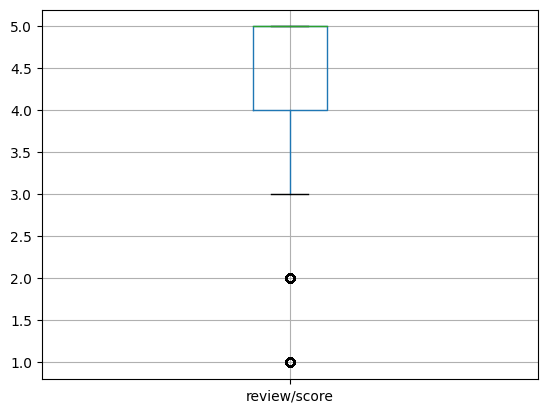

In [43]:
df_rating_processed.boxplot(column=['review/score'])

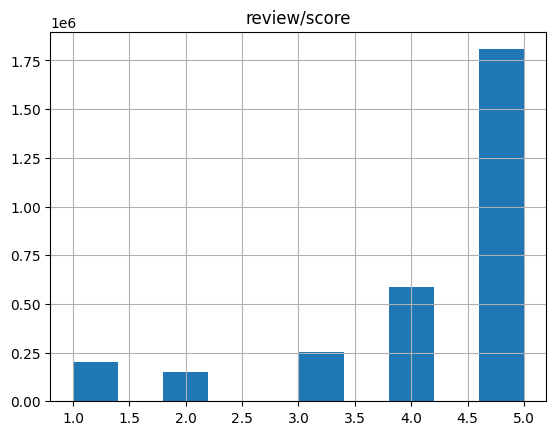

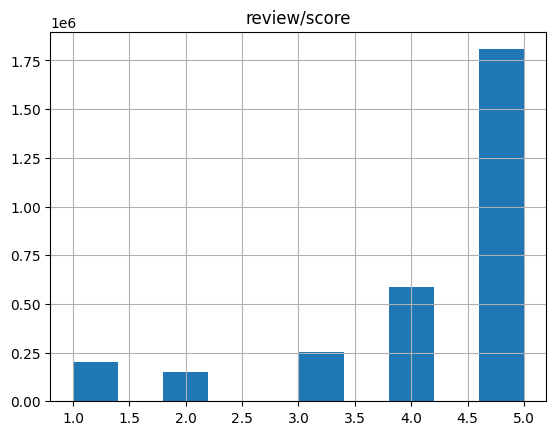

In [45]:
df_rating_processed.hist(column=['review/score'])
plt.show()

In [46]:
df_rating_processed[df_rating_processed['Title']== 'The Hobbit']['review/score'].mean()

4.657131181038006

In [47]:
df_rating_processed[df_rating_processed['Title']== 'The Hobbit']['review/score'].describe()

count    22023.000000
mean         4.657131
std          0.800452
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review/score, dtype: float64

In [48]:

df_rating_processed[df_rating_processed['Title']== 'Atlas Shrugged']['review/score'].describe()

count    12513.000000
mean         4.028690
std          1.418635
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review/score, dtype: float64